In [6]:
#import libraries 
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
#Load the images
# Load and preprocess dataset
data = []
labels = []
for label in ['yes', 'no']:
    path = rf'c:\Users\Wahaj Sajid\Desktop\Datasets\brain_tumors_data\{label}'
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path, file), 0)
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        data.append(img.reshape(128, 128, 1))
        labels.append(1 if label == 'yes' else 0)

X = np.array(data)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)



Epoch 1/5


c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.6279 - loss: 0.8477 - val_accuracy: 0.7843 - val_loss: 0.4851
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.7545 - loss: 0.5001 - val_accuracy: 0.7647 - val_loss: 0.5115
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8161 - loss: 0.4180 - val_accuracy: 0.7843 - val_loss: 0.4890
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.8564 - loss: 0.3697 - val_accuracy: 0.8039 - val_loss: 0.4446
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.8956 - loss: 0.2757 - val_accuracy: 0.8431 - val_loss: 0.4289
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8121 - loss: 0.5029


In [25]:
#save the model
model.save('tumor_detector.h5')

In [ ]:
#Evaluate model
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8121 - loss: 0.5029


[0.4288749396800995, 0.843137264251709]

In [ ]:
#calling the saved model
model = load_model(rf'C:\Users\Wahaj Sajid\Desktop\Machine Learning\Machine-Learning\DIP\DIP project\tumor_detector.h5')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


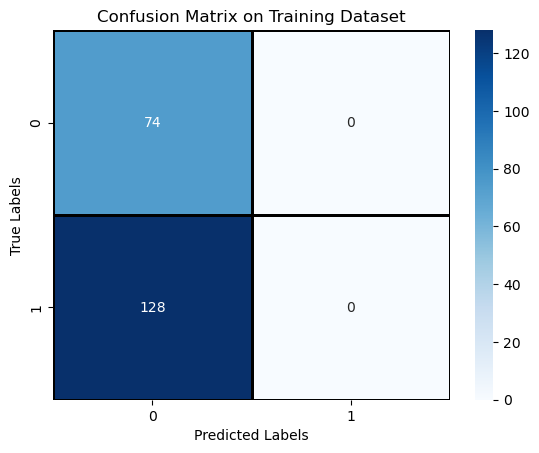

In [7]:
#confusion matrix of the model on the training data set
train_predict = model.predict(X_train)
train_cm = confusion_matrix(y_train, train_predict.argmax(axis=1))
plt.Figure(figsize=(6,5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Training Dataset')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


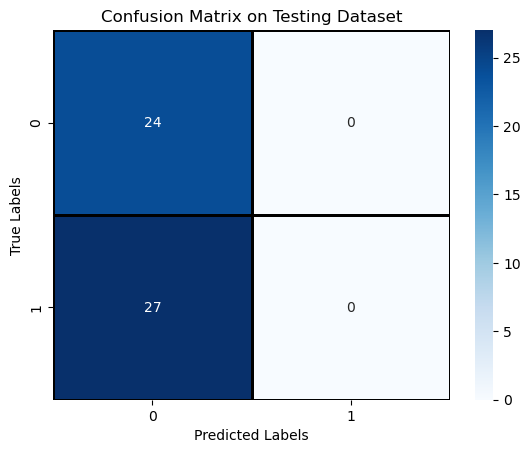

In [9]:
#confusion matrix of the model on the training data set
test_predict = model.predict(X_test)
train_cm = confusion_matrix(y_test, test_predict.argmax(axis=1))
plt.Figure(figsize=(6,5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Testing Dataset')
plt.show()

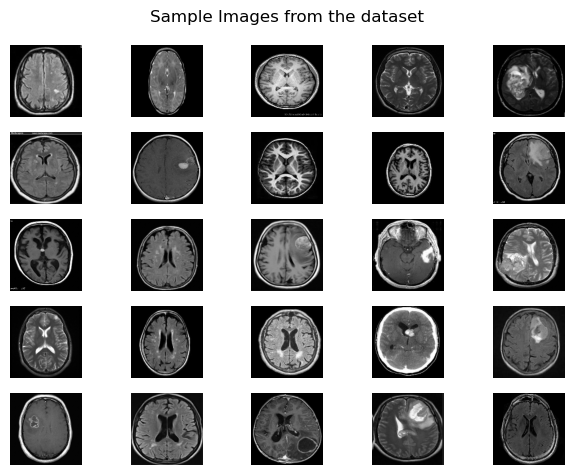

In [10]:
#Sample of the images from the datasets
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i], cmap= 'gray')
    plt.axis('off')

plt.suptitle("Sample Images from the dataset")
plt.tight_layout()
plt.show()